# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
env = gym.make('Pendulum-v0')

random_seed = 10
env.seed(random_seed)

# from agent import Agent
# agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], 
#               random_seed=random_seed)

[10]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
env.action_space, env.observation_space

(Box(1,), Box(3,))

In [4]:
action_size = env.action_space.shape[0]
state_size = env.observation_space.shape[0]

In [5]:
action_size, state_size

(1, 3)

In [6]:
env.observation_space.low, env.observation_space.high

(array([-1., -1., -8.], dtype=float32), array([1., 1., 8.], dtype=float32))

In [7]:
env.action_space.low, env.action_space.high

(array([-2.], dtype=float32), array([2.], dtype=float32))

In [8]:
env.reward_range

(-inf, inf)

### 3. Instantiate DDPG Agent

In [9]:
from agent import Agent

agent = Agent(s_size=state_size, a_size=action_size, random_seed=random_seed)

### 4. Train the Agent with DDPG

In [10]:
from collections import deque
import numpy as np
import time
import torch

n_episodes=10000
# n_steps=1000
# n_learn=10
# learn_every=20
R_goal=0 # TOCHECK
Rs_deque = deque(maxlen=100)
meanRs = [] # plot
losses = []

In [ ]:
for i_episode in range(n_episodes):
    
    s = env.reset() # s: state
    #print(s.shape)

    # initialize the score (for each agent)
    R = 0 # R: total reward

    #for i_step in range(n_steps):
    while True:
        
        s = np.reshape(s, [1, -1])
        a = agent.act(s) # a=[-2, 2]
        a *= 2
        #print(a.shape)
        
        a = np.reshape(a, [-1])
        s = np.reshape(s, [-1])
        s2, r, done, _ = env.step(a)
        #print(s2.shape, r, done)

        agent.memory.add(s, a, r, s2, done)

        R += r                           # update the score (for each agent)
        s = s2                                # roll over states to next time step

        gloss, dloss, rewards, rewards_in = agent.start_learn()

        # exit loop if episode finished
        if done:
            break

    Rs_deque.append(R)
    meanR_deque = np.mean(Rs_deque) # print
    meanRs.append(meanR_deque) # plot
    losses.append([gloss, dloss])

    print('\rEpisode {}\tTotal Average Score: {:.2f}'.format(i_episode+1, meanR_deque), 
          'Gloss:{:.4f}'.format(gloss), 'Dloss:{:.4f}'.format(dloss))
    
    if meanR_deque >= R_goal:
        torch.save(agent.g.state_dict(), 'g-pendulum.pth')
        torch.save(agent.d.state_dict(), 'd-pendulum.pth')
        break

Episode 1	Total Average Score: -877.26 Gloss:0.0000 Dloss:0.0000
Episode 2	Total Average Score: -1364.23 Gloss:0.0000 Dloss:0.0000
Episode 3	Total Average Score: -1152.01 Gloss:0.0000 Dloss:0.0000
Episode 4	Total Average Score: -1080.46 Gloss:0.0000 Dloss:0.0000
Episode 5	Total Average Score: -1179.40 Gloss:0.0000 Dloss:0.0000
Episode 6	Total Average Score: -1266.46 Gloss:6433.6914 Dloss:0.0097
Episode 7	Total Average Score: -1318.53 Gloss:6448.6055 Dloss:0.4460
Episode 8	Total Average Score: -1345.23 Gloss:6496.2402 Dloss:1.2573
Episode 9	Total Average Score: -1356.30 Gloss:6382.8760 Dloss:2.3846
Episode 10	Total Average Score: -1356.44 Gloss:6182.9512 Dloss:3.7899
Episode 11	Total Average Score: -1345.96 Gloss:5788.5498 Dloss:5.4626
Episode 12	Total Average Score: -1331.08 Gloss:5611.5840 Dloss:7.4390
Episode 13	Total Average Score: -1328.46 Gloss:5509.0610 Dloss:9.6256
Episode 14	Total Average Score: -1336.11 Gloss:5741.4854 Dloss:11.9999
Episode 15	Total Average Score: -1328.32 Glo

Episode 116	Total Average Score: -789.94 Gloss:7533.7168 Dloss:307.8829
Episode 117	Total Average Score: -795.17 Gloss:10363.2139 Dloss:309.7988
Episode 118	Total Average Score: -781.27 Gloss:5944.4834 Dloss:308.7524
Episode 119	Total Average Score: -767.55 Gloss:6665.9087 Dloss:311.9916
Episode 120	Total Average Score: -753.73 Gloss:8597.4443 Dloss:308.1440
Episode 121	Total Average Score: -740.37 Gloss:9407.5039 Dloss:306.2892
Episode 122	Total Average Score: -727.62 Gloss:7178.5029 Dloss:308.1656
Episode 123	Total Average Score: -715.02 Gloss:7531.9126 Dloss:305.2575
Episode 124	Total Average Score: -718.85 Gloss:5810.0225 Dloss:316.1830
Episode 125	Total Average Score: -706.36 Gloss:8802.3232 Dloss:305.0123
Episode 126	Total Average Score: -691.30 Gloss:9400.5254 Dloss:308.4737
Episode 127	Total Average Score: -693.90 Gloss:7599.6602 Dloss:307.1603
Episode 128	Total Average Score: -681.24 Gloss:5903.4854 Dloss:304.3266
Episode 129	Total Average Score: -663.66 Gloss:7574.5337 Dloss:

Episode 230	Total Average Score: -722.27 Gloss:5919.8369 Dloss:291.0818
Episode 231	Total Average Score: -704.24 Gloss:4349.5698 Dloss:306.9617
Episode 232	Total Average Score: -687.32 Gloss:4681.1582 Dloss:303.7881
Episode 233	Total Average Score: -686.44 Gloss:9970.9785 Dloss:294.5745
Episode 234	Total Average Score: -703.44 Gloss:9621.7578 Dloss:308.5335
Episode 235	Total Average Score: -719.16 Gloss:3110.9233 Dloss:297.2917
Episode 236	Total Average Score: -718.03 Gloss:3552.5503 Dloss:304.3565
Episode 237	Total Average Score: -714.55 Gloss:5067.7559 Dloss:301.7156
Episode 238	Total Average Score: -731.27 Gloss:6330.6641 Dloss:312.5739
Episode 239	Total Average Score: -728.98 Gloss:4382.7607 Dloss:294.8333
Episode 240	Total Average Score: -731.69 Gloss:7717.1216 Dloss:307.8452
Episode 241	Total Average Score: -730.66 Gloss:7246.5630 Dloss:306.3955
Episode 242	Total Average Score: -730.96 Gloss:5485.4473 Dloss:298.3586
Episode 243	Total Average Score: -746.91 Gloss:5022.2017 Dloss:3

Episode 344	Total Average Score: -626.65 Gloss:5141.1299 Dloss:329.8734
Episode 345	Total Average Score: -626.51 Gloss:3094.9443 Dloss:336.4376
Episode 346	Total Average Score: -609.50 Gloss:2748.2131 Dloss:316.1895
Episode 347	Total Average Score: -608.12 Gloss:4990.2393 Dloss:328.3220
Episode 348	Total Average Score: -591.39 Gloss:4897.6338 Dloss:323.2831
Episode 349	Total Average Score: -589.98 Gloss:3621.6670 Dloss:324.3003
Episode 350	Total Average Score: -589.82 Gloss:4569.8652 Dloss:326.6020
Episode 351	Total Average Score: -589.76 Gloss:4372.8486 Dloss:324.1407
Episode 352	Total Average Score: -605.25 Gloss:6045.3467 Dloss:326.3989
Episode 353	Total Average Score: -605.17 Gloss:4660.0664 Dloss:329.7753
Episode 354	Total Average Score: -605.28 Gloss:4331.0557 Dloss:322.5008
Episode 355	Total Average Score: -587.96 Gloss:5779.9102 Dloss:324.4877
Episode 356	Total Average Score: -604.82 Gloss:3099.2217 Dloss:319.6360
Episode 357	Total Average Score: -604.97 Gloss:5775.7544 Dloss:3

Episode 458	Total Average Score: -735.52 Gloss:6180.3301 Dloss:338.5262
Episode 459	Total Average Score: -735.89 Gloss:3486.4431 Dloss:341.3278
Episode 460	Total Average Score: -736.00 Gloss:2231.0923 Dloss:342.5804
Episode 461	Total Average Score: -753.14 Gloss:3693.2759 Dloss:343.6347
Episode 462	Total Average Score: -753.12 Gloss:2792.0073 Dloss:339.7471
Episode 463	Total Average Score: -770.25 Gloss:6279.0454 Dloss:352.7581
Episode 464	Total Average Score: -769.00 Gloss:3283.8843 Dloss:343.6621
Episode 465	Total Average Score: -752.16 Gloss:5577.1724 Dloss:351.4282
Episode 466	Total Average Score: -752.41 Gloss:4854.0059 Dloss:342.9299
Episode 467	Total Average Score: -753.55 Gloss:3602.9028 Dloss:345.7430
Episode 468	Total Average Score: -770.36 Gloss:2217.4907 Dloss:342.3477
Episode 469	Total Average Score: -753.50 Gloss:8924.4961 Dloss:362.4228
Episode 470	Total Average Score: -752.13 Gloss:4865.4580 Dloss:355.3952
Episode 471	Total Average Score: -769.20 Gloss:5677.2227 Dloss:3

Episode 572	Total Average Score: -861.79 Gloss:4337.5103 Dloss:369.6377
Episode 573	Total Average Score: -863.06 Gloss:6139.6860 Dloss:359.9685
Episode 574	Total Average Score: -863.08 Gloss:3978.6963 Dloss:369.9219
Episode 575	Total Average Score: -863.40 Gloss:3920.3525 Dloss:373.5744
Episode 576	Total Average Score: -846.59 Gloss:2408.6318 Dloss:374.5173
Episode 577	Total Average Score: -829.50 Gloss:3976.1401 Dloss:372.5834
Episode 578	Total Average Score: -812.25 Gloss:3636.7998 Dloss:366.3746
Episode 579	Total Average Score: -812.38 Gloss:4482.1348 Dloss:372.3769
Episode 580	Total Average Score: -812.42 Gloss:2149.9058 Dloss:363.0191
Episode 581	Total Average Score: -812.45 Gloss:4777.1099 Dloss:377.5602
Episode 582	Total Average Score: -829.74 Gloss:3215.2273 Dloss:361.1163
Episode 583	Total Average Score: -829.72 Gloss:3468.9375 Dloss:365.9668
Episode 584	Total Average Score: -813.07 Gloss:2810.8989 Dloss:366.9893
Episode 585	Total Average Score: -795.93 Gloss:3718.8230 Dloss:3

Episode 686	Total Average Score: -880.50 Gloss:2830.6816 Dloss:378.4083
Episode 687	Total Average Score: -879.44 Gloss:3667.4124 Dloss:378.8161
Episode 688	Total Average Score: -879.71 Gloss:4166.7822 Dloss:393.7553
Episode 689	Total Average Score: -879.78 Gloss:3233.1362 Dloss:390.2412
Episode 690	Total Average Score: -878.59 Gloss:5755.5195 Dloss:392.4235
Episode 691	Total Average Score: -878.44 Gloss:5530.9756 Dloss:373.3739
Episode 692	Total Average Score: -861.33 Gloss:4980.2754 Dloss:382.3395
Episode 693	Total Average Score: -861.37 Gloss:2672.5203 Dloss:378.7064
Episode 694	Total Average Score: -878.58 Gloss:2589.9797 Dloss:386.2460
Episode 695	Total Average Score: -879.76 Gloss:3795.9097 Dloss:377.8370
Episode 696	Total Average Score: -862.70 Gloss:4683.0156 Dloss:387.5749
Episode 697	Total Average Score: -880.05 Gloss:3660.8225 Dloss:377.1708
Episode 698	Total Average Score: -863.07 Gloss:6308.3623 Dloss:382.1166
Episode 699	Total Average Score: -863.02 Gloss:4693.8613 Dloss:3

Episode 800	Total Average Score: -730.92 Gloss:5152.7729 Dloss:380.0986
Episode 801	Total Average Score: -730.17 Gloss:2594.9927 Dloss:393.4882
Episode 802	Total Average Score: -747.09 Gloss:7601.0454 Dloss:390.8440
Episode 803	Total Average Score: -763.16 Gloss:8291.1484 Dloss:394.1137
Episode 804	Total Average Score: -779.99 Gloss:8067.3579 Dloss:405.7781
Episode 805	Total Average Score: -796.19 Gloss:4366.7178 Dloss:385.4581
Episode 806	Total Average Score: -796.15 Gloss:3796.5229 Dloss:408.6443
Episode 807	Total Average Score: -777.48 Gloss:7463.0830 Dloss:386.9772
Episode 808	Total Average Score: -793.85 Gloss:5319.2437 Dloss:382.0879
Episode 809	Total Average Score: -810.16 Gloss:4442.4976 Dloss:380.9940
Episode 810	Total Average Score: -808.78 Gloss:5612.3545 Dloss:397.2299
Episode 811	Total Average Score: -808.22 Gloss:4943.8252 Dloss:387.3580
Episode 812	Total Average Score: -825.23 Gloss:6820.1113 Dloss:383.2861
Episode 813	Total Average Score: -842.51 Gloss:6935.4336 Dloss:3

Episode 913	Total Average Score: -1345.36 Gloss:3405.3560 Dloss:404.9408
Episode 914	Total Average Score: -1363.43 Gloss:3525.6995 Dloss:400.6860
Episode 915	Total Average Score: -1364.72 Gloss:3793.4766 Dloss:391.6527
Episode 916	Total Average Score: -1347.39 Gloss:4823.1055 Dloss:390.6700
Episode 917	Total Average Score: -1329.90 Gloss:5610.5146 Dloss:406.2485
Episode 918	Total Average Score: -1330.79 Gloss:2229.9824 Dloss:403.2843
Episode 919	Total Average Score: -1346.03 Gloss:3942.1414 Dloss:395.2974
Episode 920	Total Average Score: -1350.87 Gloss:3052.2410 Dloss:397.6598
Episode 921	Total Average Score: -1368.85 Gloss:5313.3223 Dloss:408.2399
Episode 922	Total Average Score: -1353.04 Gloss:6110.4023 Dloss:396.1531
Episode 923	Total Average Score: -1336.09 Gloss:2933.3203 Dloss:400.5917
Episode 924	Total Average Score: -1336.20 Gloss:4710.0654 Dloss:396.9105
Episode 925	Total Average Score: -1336.00 Gloss:4245.8423 Dloss:405.1490
Episode 926	Total Average Score: -1335.58 Gloss:897

Episode 1025	Total Average Score: -1202.02 Gloss:4284.3838 Dloss:436.1529
Episode 1026	Total Average Score: -1185.22 Gloss:5726.1191 Dloss:442.4780
Episode 1027	Total Average Score: -1185.06 Gloss:2244.1436 Dloss:444.7137
Episode 1028	Total Average Score: -1187.44 Gloss:5262.3906 Dloss:447.8601
Episode 1029	Total Average Score: -1171.33 Gloss:4465.7534 Dloss:445.1389
Episode 1030	Total Average Score: -1170.87 Gloss:4140.8516 Dloss:440.3790
Episode 1031	Total Average Score: -1171.68 Gloss:3889.0713 Dloss:438.5401
Episode 1032	Total Average Score: -1170.44 Gloss:4826.7793 Dloss:446.7473
Episode 1033	Total Average Score: -1166.41 Gloss:6018.9639 Dloss:442.3769
Episode 1034	Total Average Score: -1183.17 Gloss:5437.6045 Dloss:436.3824
Episode 1035	Total Average Score: -1164.60 Gloss:1618.1997 Dloss:456.3469
Episode 1036	Total Average Score: -1180.37 Gloss:4141.0234 Dloss:449.2209
Episode 1037	Total Average Score: -1197.06 Gloss:7549.8530 Dloss:449.1965
Episode 1038	Total Average Score: -121

Episode 1136	Total Average Score: -1192.69 Gloss:5327.2808 Dloss:481.5410
Episode 1137	Total Average Score: -1191.27 Gloss:4941.0625 Dloss:465.6733
Episode 1138	Total Average Score: -1190.33 Gloss:8228.6299 Dloss:484.0038
Episode 1139	Total Average Score: -1206.35 Gloss:10700.2012 Dloss:470.0145
Episode 1140	Total Average Score: -1223.66 Gloss:3258.8660 Dloss:461.0076
Episode 1141	Total Average Score: -1205.55 Gloss:4649.0732 Dloss:464.1265
Episode 1142	Total Average Score: -1204.57 Gloss:5888.9082 Dloss:464.8530
Episode 1143	Total Average Score: -1202.89 Gloss:7313.1792 Dloss:465.3166
Episode 1144	Total Average Score: -1201.50 Gloss:7475.8105 Dloss:473.5355
Episode 1145	Total Average Score: -1215.83 Gloss:5630.9424 Dloss:467.8949
Episode 1146	Total Average Score: -1231.06 Gloss:8132.6172 Dloss:468.6331
Episode 1147	Total Average Score: -1248.30 Gloss:7120.9941 Dloss:465.9358
Episode 1148	Total Average Score: -1246.71 Gloss:5377.9897 Dloss:476.5889
Episode 1149	Total Average Score: -12

Episode 1247	Total Average Score: -1317.32 Gloss:3127.3740 Dloss:493.6277
Episode 1248	Total Average Score: -1318.66 Gloss:9019.3203 Dloss:485.1399
Episode 1249	Total Average Score: -1319.30 Gloss:7514.3857 Dloss:491.9061
Episode 1250	Total Average Score: -1319.43 Gloss:5985.8623 Dloss:485.8495
Episode 1251	Total Average Score: -1336.35 Gloss:5273.8716 Dloss:487.4104
Episode 1252	Total Average Score: -1318.56 Gloss:3645.7925 Dloss:489.1556
Episode 1253	Total Average Score: -1318.44 Gloss:7697.6084 Dloss:494.4712
Episode 1254	Total Average Score: -1300.82 Gloss:2440.3943 Dloss:483.7307
Episode 1255	Total Average Score: -1282.98 Gloss:6093.8994 Dloss:493.8689
Episode 1256	Total Average Score: -1281.23 Gloss:4765.3740 Dloss:493.1449
Episode 1257	Total Average Score: -1298.48 Gloss:7245.5479 Dloss:487.2518
Episode 1258	Total Average Score: -1298.44 Gloss:4879.0225 Dloss:490.9690
Episode 1259	Total Average Score: -1298.95 Gloss:3160.9802 Dloss:492.9714
Episode 1260	Total Average Score: -129

Episode 1358	Total Average Score: -1222.98 Gloss:30162.5508 Dloss:401.7037
Episode 1359	Total Average Score: -1220.49 Gloss:18771.9492 Dloss:391.9525
Episode 1360	Total Average Score: -1205.68 Gloss:25414.1445 Dloss:393.8030
Episode 1361	Total Average Score: -1190.41 Gloss:27976.7695 Dloss:395.4519
Episode 1362	Total Average Score: -1172.83 Gloss:24137.5508 Dloss:382.3163
Episode 1363	Total Average Score: -1163.19 Gloss:26665.6133 Dloss:389.6106
Episode 1364	Total Average Score: -1162.02 Gloss:23622.9727 Dloss:388.7691
Episode 1365	Total Average Score: -1149.14 Gloss:23165.1094 Dloss:377.0631
Episode 1366	Total Average Score: -1149.22 Gloss:28597.0801 Dloss:372.6457
Episode 1367	Total Average Score: -1146.59 Gloss:23683.9766 Dloss:375.7563
Episode 1368	Total Average Score: -1145.45 Gloss:22434.0215 Dloss:362.7249
Episode 1369	Total Average Score: -1160.71 Gloss:15239.3926 Dloss:361.8436
Episode 1370	Total Average Score: -1160.17 Gloss:16386.0820 Dloss:359.7837
Episode 1371	Total Averag

Episode 1468	Total Average Score: -959.37 Gloss:11986.9609 Dloss:361.7897
Episode 1469	Total Average Score: -957.39 Gloss:29787.9961 Dloss:347.0931
Episode 1470	Total Average Score: -955.36 Gloss:17245.9180 Dloss:357.8398
Episode 1471	Total Average Score: -952.43 Gloss:24380.6211 Dloss:346.3433
Episode 1472	Total Average Score: -952.13 Gloss:16041.3369 Dloss:349.4031
Episode 1473	Total Average Score: -936.51 Gloss:12299.1406 Dloss:340.2217
Episode 1474	Total Average Score: -936.00 Gloss:15333.4590 Dloss:353.5859
Episode 1475	Total Average Score: -931.40 Gloss:16598.5273 Dloss:354.4581
Episode 1476	Total Average Score: -945.74 Gloss:19893.8730 Dloss:347.2559
Episode 1477	Total Average Score: -946.26 Gloss:15064.5312 Dloss:355.9918
Episode 1478	Total Average Score: -941.93 Gloss:15421.7715 Dloss:358.3608
Episode 1479	Total Average Score: -955.68 Gloss:23045.8945 Dloss:360.2066
Episode 1480	Total Average Score: -970.37 Gloss:16640.8008 Dloss:344.0334
Episode 1481	Total Average Score: -983

Episode 1578	Total Average Score: -1354.29 Gloss:49076.7852 Dloss:438.1425
Episode 1579	Total Average Score: -1355.83 Gloss:63447.8594 Dloss:406.0981
Episode 1580	Total Average Score: -1357.00 Gloss:35587.2891 Dloss:441.3951
Episode 1581	Total Average Score: -1358.12 Gloss:52395.7773 Dloss:472.6945
Episode 1582	Total Average Score: -1357.54 Gloss:56261.4219 Dloss:418.2241
Episode 1583	Total Average Score: -1360.10 Gloss:56245.5312 Dloss:404.6279
Episode 1584	Total Average Score: -1362.05 Gloss:31725.8867 Dloss:441.5648
Episode 1585	Total Average Score: -1366.98 Gloss:32995.3750 Dloss:455.4556
Episode 1586	Total Average Score: -1354.60 Gloss:39976.8828 Dloss:463.1654
Episode 1587	Total Average Score: -1357.69 Gloss:50932.0000 Dloss:430.1088
Episode 1588	Total Average Score: -1358.54 Gloss:78263.6094 Dloss:441.9810
Episode 1589	Total Average Score: -1374.73 Gloss:56126.1602 Dloss:447.7883
Episode 1590	Total Average Score: -1376.63 Gloss:57758.5781 Dloss:429.6754
Episode 1591	Total Averag

Episode 1688	Total Average Score: -1396.51 Gloss:59905.0273 Dloss:478.3781
Episode 1689	Total Average Score: -1394.57 Gloss:85227.6094 Dloss:542.1206
Episode 1690	Total Average Score: -1392.64 Gloss:81043.6562 Dloss:528.2372
Episode 1691	Total Average Score: -1408.95 Gloss:51859.0586 Dloss:526.9363
Episode 1692	Total Average Score: -1407.72 Gloss:75622.0703 Dloss:565.9456
Episode 1693	Total Average Score: -1407.33 Gloss:72503.5703 Dloss:462.3539
Episode 1694	Total Average Score: -1404.94 Gloss:45044.0352 Dloss:570.7537
Episode 1695	Total Average Score: -1405.26 Gloss:81442.8594 Dloss:492.6998
Episode 1696	Total Average Score: -1405.85 Gloss:63664.2617 Dloss:554.8650
Episode 1697	Total Average Score: -1404.73 Gloss:52978.9492 Dloss:517.2968
Episode 1698	Total Average Score: -1403.35 Gloss:78650.6875 Dloss:496.6780
Episode 1699	Total Average Score: -1401.92 Gloss:53865.6406 Dloss:552.0920
Episode 1700	Total Average Score: -1402.47 Gloss:63310.3789 Dloss:566.2467
Episode 1701	Total Averag

Episode 1798	Total Average Score: -1454.40 Gloss:54249.4727 Dloss:514.0295
Episode 1799	Total Average Score: -1454.28 Gloss:76493.9219 Dloss:449.6483
Episode 1800	Total Average Score: -1453.56 Gloss:55060.6406 Dloss:476.5121
Episode 1801	Total Average Score: -1453.42 Gloss:61597.7656 Dloss:487.9290
Episode 1802	Total Average Score: -1453.42 Gloss:58362.5469 Dloss:459.2880
Episode 1803	Total Average Score: -1452.52 Gloss:47882.1484 Dloss:499.1245
Episode 1804	Total Average Score: -1453.68 Gloss:79692.4062 Dloss:476.8705
Episode 1805	Total Average Score: -1451.51 Gloss:70871.4297 Dloss:469.2733
Episode 1806	Total Average Score: -1451.33 Gloss:42771.0820 Dloss:459.6002
Episode 1807	Total Average Score: -1436.36 Gloss:67144.1016 Dloss:454.5385
Episode 1808	Total Average Score: -1437.13 Gloss:65516.4922 Dloss:443.0223
Episode 1809	Total Average Score: -1435.67 Gloss:45891.1328 Dloss:452.6399
Episode 1810	Total Average Score: -1434.23 Gloss:67275.7344 Dloss:486.5579
Episode 1811	Total Averag

Episode 1908	Total Average Score: -1453.26 Gloss:13411.4023 Dloss:333.1163
Episode 1909	Total Average Score: -1454.84 Gloss:13404.8926 Dloss:321.5604
Episode 1910	Total Average Score: -1454.89 Gloss:10465.6846 Dloss:328.1248
Episode 1911	Total Average Score: -1453.83 Gloss:11223.4756 Dloss:322.2039
Episode 1912	Total Average Score: -1453.72 Gloss:12770.9932 Dloss:329.5430
Episode 1913	Total Average Score: -1455.27 Gloss:6850.8779 Dloss:307.9072
Episode 1914	Total Average Score: -1456.03 Gloss:8568.8955 Dloss:312.6426
Episode 1915	Total Average Score: -1456.02 Gloss:8233.1826 Dloss:307.8577
Episode 1916	Total Average Score: -1457.34 Gloss:11999.6162 Dloss:312.8962
Episode 1917	Total Average Score: -1457.35 Gloss:8908.9004 Dloss:313.0056
Episode 1918	Total Average Score: -1457.35 Gloss:11882.5332 Dloss:316.2740
Episode 1919	Total Average Score: -1455.85 Gloss:9111.2812 Dloss:321.0055
Episode 1920	Total Average Score: -1455.06 Gloss:7950.2744 Dloss:312.9755
Episode 1921	Total Average Scor

Episode 2019	Total Average Score: -1016.35 Gloss:6191.3604 Dloss:348.8904
Episode 2020	Total Average Score: -1003.36 Gloss:6129.0010 Dloss:351.9680
Episode 2021	Total Average Score: -991.40 Gloss:4132.2012 Dloss:341.7366
Episode 2022	Total Average Score: -977.72 Gloss:3629.8286 Dloss:336.5814
Episode 2023	Total Average Score: -963.29 Gloss:3993.2917 Dloss:335.6663
Episode 2024	Total Average Score: -946.78 Gloss:5050.5781 Dloss:331.5104
Episode 2025	Total Average Score: -934.31 Gloss:6665.2979 Dloss:331.0743
Episode 2026	Total Average Score: -921.39 Gloss:4429.6714 Dloss:325.8918
Episode 2027	Total Average Score: -908.52 Gloss:6440.5049 Dloss:313.6318
Episode 2028	Total Average Score: -896.58 Gloss:4586.9023 Dloss:314.6167
Episode 2029	Total Average Score: -884.68 Gloss:6065.1250 Dloss:316.1721
Episode 2030	Total Average Score: -871.42 Gloss:4156.0962 Dloss:315.3325
Episode 2031	Total Average Score: -860.44 Gloss:6112.6313 Dloss:308.3928
Episode 2032	Total Average Score: -845.83 Gloss:4

Episode 2132	Total Average Score: -238.87 Gloss:2630.4880 Dloss:241.8573
Episode 2133	Total Average Score: -238.92 Gloss:3601.9546 Dloss:242.9525
Episode 2134	Total Average Score: -240.18 Gloss:3965.5654 Dloss:240.0704
Episode 2135	Total Average Score: -241.66 Gloss:6279.7363 Dloss:243.8499
Episode 2136	Total Average Score: -239.15 Gloss:3006.0088 Dloss:245.7015
Episode 2137	Total Average Score: -239.24 Gloss:2944.0762 Dloss:243.3484
Episode 2138	Total Average Score: -228.08 Gloss:4749.3838 Dloss:243.9308
Episode 2139	Total Average Score: -223.85 Gloss:2855.7153 Dloss:235.6915
Episode 2140	Total Average Score: -219.83 Gloss:2817.7971 Dloss:239.6178
Episode 2141	Total Average Score: -209.95 Gloss:6085.0830 Dloss:242.9359
Episode 2142	Total Average Score: -209.96 Gloss:3333.7544 Dloss:237.2861
Episode 2143	Total Average Score: -206.68 Gloss:3207.5986 Dloss:241.2048
Episode 2144	Total Average Score: -206.35 Gloss:5886.0303 Dloss:237.3553
Episode 2145	Total Average Score: -206.39 Gloss:313

Episode 2245	Total Average Score: -201.30 Gloss:3837.8657 Dloss:199.0398
Episode 2246	Total Average Score: -201.28 Gloss:3374.6941 Dloss:202.8606
Episode 2247	Total Average Score: -203.73 Gloss:3043.1567 Dloss:202.1528
Episode 2248	Total Average Score: -201.33 Gloss:3764.8523 Dloss:200.5307
Episode 2249	Total Average Score: -199.99 Gloss:2478.3921 Dloss:203.8820
Episode 2250	Total Average Score: -199.89 Gloss:4362.0874 Dloss:209.0445
Episode 2251	Total Average Score: -199.80 Gloss:3752.0022 Dloss:205.3128
Episode 2252	Total Average Score: -199.80 Gloss:3557.9819 Dloss:205.3948
Episode 2253	Total Average Score: -199.78 Gloss:2263.4370 Dloss:201.0486
Episode 2254	Total Average Score: -201.42 Gloss:4207.5142 Dloss:206.6222
Episode 2255	Total Average Score: -200.10 Gloss:4970.1406 Dloss:201.5159
Episode 2256	Total Average Score: -200.09 Gloss:3574.0535 Dloss:211.0312
Episode 2257	Total Average Score: -200.12 Gloss:2903.4248 Dloss:202.3065
Episode 2258	Total Average Score: -201.61 Gloss:419

Episode 2358	Total Average Score: -185.06 Gloss:5939.7119 Dloss:214.1481
Episode 2359	Total Average Score: -183.66 Gloss:4722.0205 Dloss:214.4128
Episode 2360	Total Average Score: -183.70 Gloss:4355.7544 Dloss:214.3708
Episode 2361	Total Average Score: -185.17 Gloss:5508.4067 Dloss:211.7814
Episode 2362	Total Average Score: -186.50 Gloss:4371.8633 Dloss:216.2809
Episode 2363	Total Average Score: -185.23 Gloss:3609.7585 Dloss:215.0087
Episode 2364	Total Average Score: -182.89 Gloss:7570.4023 Dloss:216.1906
Episode 2365	Total Average Score: -182.41 Gloss:4303.8115 Dloss:214.3399
Episode 2366	Total Average Score: -184.01 Gloss:3826.8677 Dloss:214.7355
Episode 2367	Total Average Score: -186.21 Gloss:4607.1387 Dloss:211.8617
Episode 2368	Total Average Score: -186.19 Gloss:4868.3125 Dloss:215.0202
Episode 2369	Total Average Score: -187.23 Gloss:4526.7354 Dloss:213.2222
Episode 2370	Total Average Score: -187.24 Gloss:4156.7271 Dloss:216.1324
Episode 2371	Total Average Score: -185.94 Gloss:365

Episode 2471	Total Average Score: -209.25 Gloss:3618.3193 Dloss:192.2348
Episode 2472	Total Average Score: -208.03 Gloss:3458.4653 Dloss:195.4287
Episode 2473	Total Average Score: -208.16 Gloss:5641.2212 Dloss:191.6906
Episode 2474	Total Average Score: -209.46 Gloss:7457.6494 Dloss:195.9901
Episode 2475	Total Average Score: -210.60 Gloss:4110.7988 Dloss:192.5616
Episode 2476	Total Average Score: -210.48 Gloss:3853.3506 Dloss:189.9408
Episode 2477	Total Average Score: -207.15 Gloss:3719.7717 Dloss:190.1823
Episode 2478	Total Average Score: -207.01 Gloss:4984.4058 Dloss:194.0862
Episode 2479	Total Average Score: -206.95 Gloss:3971.6726 Dloss:188.8192
Episode 2480	Total Average Score: -202.93 Gloss:3763.8789 Dloss:186.6231
Episode 2481	Total Average Score: -202.98 Gloss:4125.9165 Dloss:192.5301
Episode 2482	Total Average Score: -200.35 Gloss:4338.1787 Dloss:191.0323
Episode 2483	Total Average Score: -201.17 Gloss:4093.5349 Dloss:185.9284
Episode 2484	Total Average Score: -202.74 Gloss:593

Episode 2584	Total Average Score: -217.41 Gloss:4110.2954 Dloss:171.5088
Episode 2585	Total Average Score: -213.85 Gloss:2487.4880 Dloss:172.2475
Episode 2586	Total Average Score: -213.90 Gloss:2185.0293 Dloss:177.0920
Episode 2587	Total Average Score: -213.78 Gloss:3469.5107 Dloss:177.4075
Episode 2588	Total Average Score: -211.39 Gloss:4186.2212 Dloss:174.0040
Episode 2589	Total Average Score: -212.58 Gloss:3918.2896 Dloss:171.8770
Episode 2590	Total Average Score: -216.16 Gloss:4911.2451 Dloss:179.2574
Episode 2591	Total Average Score: -217.23 Gloss:4166.6880 Dloss:176.2300
Episode 2592	Total Average Score: -214.20 Gloss:4465.3359 Dloss:172.7524
Episode 2593	Total Average Score: -209.95 Gloss:4250.0156 Dloss:175.2787
Episode 2594	Total Average Score: -210.11 Gloss:3976.0510 Dloss:173.7597
Episode 2595	Total Average Score: -213.72 Gloss:4010.6694 Dloss:172.6653
Episode 2596	Total Average Score: -211.09 Gloss:3697.7996 Dloss:182.0366
Episode 2597	Total Average Score: -215.01 Gloss:411

Episode 2697	Total Average Score: -221.53 Gloss:4791.0581 Dloss:178.0671
Episode 2698	Total Average Score: -218.68 Gloss:2940.9111 Dloss:174.8479
Episode 2699	Total Average Score: -215.81 Gloss:2229.2310 Dloss:175.6519
Episode 2700	Total Average Score: -214.58 Gloss:4588.8672 Dloss:178.3545
Episode 2701	Total Average Score: -212.49 Gloss:3115.4551 Dloss:179.3696
Episode 2702	Total Average Score: -209.50 Gloss:3653.8853 Dloss:177.5403
Episode 2703	Total Average Score: -206.21 Gloss:2111.3320 Dloss:175.7481
Episode 2704	Total Average Score: -206.21 Gloss:3509.7671 Dloss:174.6096
Episode 2705	Total Average Score: -203.69 Gloss:2133.8579 Dloss:173.2571
Episode 2706	Total Average Score: -199.76 Gloss:2868.1387 Dloss:175.5880
Episode 2707	Total Average Score: -199.71 Gloss:3487.0288 Dloss:175.8514
Episode 2708	Total Average Score: -197.10 Gloss:3355.5154 Dloss:172.5225
Episode 2709	Total Average Score: -195.79 Gloss:4237.0806 Dloss:177.1675
Episode 2710	Total Average Score: -196.48 Gloss:316

Episode 2810	Total Average Score: -204.88 Gloss:3390.9009 Dloss:177.1317
Episode 2811	Total Average Score: -204.80 Gloss:3547.0730 Dloss:177.2299
Episode 2812	Total Average Score: -203.70 Gloss:2790.4517 Dloss:182.8472
Episode 2813	Total Average Score: -204.89 Gloss:3210.7139 Dloss:181.9446
Episode 2814	Total Average Score: -204.98 Gloss:2771.7065 Dloss:179.1918
Episode 2815	Total Average Score: -206.13 Gloss:4327.7803 Dloss:180.9977
Episode 2816	Total Average Score: -206.10 Gloss:2771.2329 Dloss:174.5602
Episode 2817	Total Average Score: -207.32 Gloss:3757.1487 Dloss:177.3011
Episode 2818	Total Average Score: -207.24 Gloss:4823.4521 Dloss:173.9015
Episode 2819	Total Average Score: -207.97 Gloss:2835.4917 Dloss:172.0592
Episode 2820	Total Average Score: -208.05 Gloss:4593.4307 Dloss:173.7646
Episode 2821	Total Average Score: -209.62 Gloss:3176.1902 Dloss:177.4246
Episode 2822	Total Average Score: -210.96 Gloss:3663.7092 Dloss:175.5615
Episode 2823	Total Average Score: -210.85 Gloss:360

Episode 2923	Total Average Score: -222.49 Gloss:3478.6768 Dloss:168.4144
Episode 2924	Total Average Score: -221.31 Gloss:3318.9695 Dloss:175.4120
Episode 2925	Total Average Score: -221.31 Gloss:2448.3906 Dloss:174.2421
Episode 2926	Total Average Score: -218.93 Gloss:3335.0190 Dloss:173.2274
Episode 2927	Total Average Score: -218.97 Gloss:2379.4893 Dloss:174.3694
Episode 2928	Total Average Score: -218.72 Gloss:3131.7534 Dloss:171.1227
Episode 2929	Total Average Score: -218.74 Gloss:2597.3096 Dloss:170.8433
Episode 2930	Total Average Score: -218.39 Gloss:3663.0698 Dloss:175.7014
Episode 2931	Total Average Score: -218.67 Gloss:3547.7222 Dloss:172.6935
Episode 2932	Total Average Score: -217.38 Gloss:3674.9062 Dloss:179.1116
Episode 2933	Total Average Score: -216.11 Gloss:3506.5615 Dloss:179.7404
Episode 2934	Total Average Score: -216.18 Gloss:2437.0659 Dloss:172.7880
Episode 2935	Total Average Score: -216.16 Gloss:4801.5361 Dloss:166.4059
Episode 2936	Total Average Score: -214.43 Gloss:371

Episode 3036	Total Average Score: -187.51 Gloss:4000.6846 Dloss:173.1558
Episode 3037	Total Average Score: -187.52 Gloss:5145.0645 Dloss:173.7836
Episode 3038	Total Average Score: -188.66 Gloss:3559.0571 Dloss:176.5328
Episode 3039	Total Average Score: -191.34 Gloss:5020.7251 Dloss:175.0033
Episode 3040	Total Average Score: -190.19 Gloss:2957.4822 Dloss:175.4547
Episode 3041	Total Average Score: -190.22 Gloss:1931.8728 Dloss:176.6380
Episode 3042	Total Average Score: -190.22 Gloss:2456.4927 Dloss:172.7556
Episode 3043	Total Average Score: -192.10 Gloss:4139.4531 Dloss:176.5479
Episode 3044	Total Average Score: -193.29 Gloss:3087.3965 Dloss:176.5008
Episode 3045	Total Average Score: -193.51 Gloss:2679.9402 Dloss:171.3124
Episode 3046	Total Average Score: -193.11 Gloss:2589.4536 Dloss:165.9498
Episode 3047	Total Average Score: -199.67 Gloss:3154.0054 Dloss:169.1716
Episode 3048	Total Average Score: -200.22 Gloss:2844.8696 Dloss:172.3448
Episode 3049	Total Average Score: -202.56 Gloss:350

Episode 3149	Total Average Score: -220.94 Gloss:2620.6460 Dloss:165.2576
Episode 3150	Total Average Score: -218.57 Gloss:2353.6118 Dloss:161.6249
Episode 3151	Total Average Score: -220.68 Gloss:1682.6074 Dloss:163.3518
Episode 3152	Total Average Score: -221.83 Gloss:3960.7861 Dloss:168.1924
Episode 3153	Total Average Score: -226.36 Gloss:3511.3240 Dloss:164.7966
Episode 3154	Total Average Score: -226.42 Gloss:3239.5146 Dloss:165.8221
Episode 3155	Total Average Score: -226.43 Gloss:1836.1509 Dloss:161.3254
Episode 3156	Total Average Score: -229.28 Gloss:5485.9316 Dloss:164.3991
Episode 3157	Total Average Score: -229.84 Gloss:2439.7012 Dloss:166.8656
Episode 3158	Total Average Score: -228.38 Gloss:3680.2451 Dloss:165.9062
Episode 3159	Total Average Score: -226.13 Gloss:3609.7271 Dloss:163.7113
Episode 3160	Total Average Score: -227.24 Gloss:4447.8774 Dloss:164.0860
Episode 3161	Total Average Score: -228.36 Gloss:4054.9387 Dloss:171.0615
Episode 3162	Total Average Score: -229.36 Gloss:357

Episode 3262	Total Average Score: -192.96 Gloss:4899.1841 Dloss:169.3557
Episode 3263	Total Average Score: -192.89 Gloss:3393.6821 Dloss:170.8384
Episode 3264	Total Average Score: -192.90 Gloss:4409.8105 Dloss:159.1908
Episode 3265	Total Average Score: -192.86 Gloss:4247.9219 Dloss:166.5542
Episode 3266	Total Average Score: -194.97 Gloss:3268.0933 Dloss:161.0027
Episode 3267	Total Average Score: -197.34 Gloss:3761.8926 Dloss:155.9317
Episode 3268	Total Average Score: -196.17 Gloss:4742.1733 Dloss:163.6277
Episode 3269	Total Average Score: -196.13 Gloss:2453.2229 Dloss:159.7513
Episode 3270	Total Average Score: -198.52 Gloss:3911.0044 Dloss:159.9434
Episode 3271	Total Average Score: -198.47 Gloss:4699.1162 Dloss:153.0198
Episode 3272	Total Average Score: -198.38 Gloss:5527.6865 Dloss:165.6548
Episode 3273	Total Average Score: -197.09 Gloss:3067.6863 Dloss:163.7080
Episode 3274	Total Average Score: -192.94 Gloss:3365.4692 Dloss:155.1594
Episode 3275	Total Average Score: -192.95 Gloss:355

Episode 3375	Total Average Score: -209.71 Gloss:2628.0039 Dloss:157.1924
Episode 3376	Total Average Score: -209.75 Gloss:3734.1123 Dloss:149.3144
Episode 3377	Total Average Score: -211.00 Gloss:1612.5454 Dloss:152.0211
Episode 3378	Total Average Score: -213.35 Gloss:4000.8640 Dloss:143.0148
Episode 3379	Total Average Score: -212.23 Gloss:3623.7441 Dloss:143.2020
Episode 3380	Total Average Score: -210.95 Gloss:3035.3889 Dloss:152.2057
Episode 3381	Total Average Score: -212.22 Gloss:2794.5361 Dloss:146.3934
Episode 3382	Total Average Score: -211.03 Gloss:2520.4062 Dloss:151.3431
Episode 3383	Total Average Score: -211.08 Gloss:3253.1519 Dloss:144.8763
Episode 3384	Total Average Score: -208.63 Gloss:3338.2781 Dloss:145.5766
Episode 3385	Total Average Score: -205.05 Gloss:5180.3384 Dloss:150.2887
Episode 3386	Total Average Score: -202.29 Gloss:3506.1687 Dloss:141.8919
Episode 3387	Total Average Score: -203.66 Gloss:3615.9370 Dloss:143.9153
Episode 3388	Total Average Score: -205.96 Gloss:289

Episode 3488	Total Average Score: -186.79 Gloss:2358.1543 Dloss:142.1329
Episode 3489	Total Average Score: -188.04 Gloss:5176.2354 Dloss:138.6464
Episode 3490	Total Average Score: -188.01 Gloss:2640.2144 Dloss:139.7767
Episode 3491	Total Average Score: -186.29 Gloss:3288.2427 Dloss:141.4288
Episode 3492	Total Average Score: -183.89 Gloss:3162.4995 Dloss:137.2678
Episode 3493	Total Average Score: -185.70 Gloss:1970.5212 Dloss:135.6108
Episode 3494	Total Average Score: -185.60 Gloss:2924.0693 Dloss:143.6985
Episode 3495	Total Average Score: -187.44 Gloss:2730.1284 Dloss:139.6714
Episode 3496	Total Average Score: -187.35 Gloss:3024.6338 Dloss:136.7567
Episode 3497	Total Average Score: -186.11 Gloss:2521.5010 Dloss:140.5505
Episode 3498	Total Average Score: -188.66 Gloss:3158.2825 Dloss:133.3348
Episode 3499	Total Average Score: -188.59 Gloss:3057.5701 Dloss:144.0385
Episode 3500	Total Average Score: -189.71 Gloss:5390.2915 Dloss:139.3300
Episode 3501	Total Average Score: -188.46 Gloss:377

Episode 3601	Total Average Score: -204.30 Gloss:6582.3135 Dloss:141.9845
Episode 3602	Total Average Score: -204.32 Gloss:4188.4053 Dloss:136.5610
Episode 3603	Total Average Score: -204.34 Gloss:4926.1123 Dloss:141.7949
Episode 3604	Total Average Score: -204.36 Gloss:3343.0493 Dloss:147.7589
Episode 3605	Total Average Score: -205.62 Gloss:6520.0342 Dloss:142.4615
Episode 3606	Total Average Score: -204.10 Gloss:2567.8435 Dloss:147.0429
Episode 3607	Total Average Score: -203.04 Gloss:5389.6064 Dloss:143.7952
Episode 3608	Total Average Score: -200.18 Gloss:4664.5088 Dloss:141.1378
Episode 3609	Total Average Score: -200.21 Gloss:5040.5747 Dloss:147.7620
Episode 3610	Total Average Score: -200.25 Gloss:4948.4922 Dloss:145.3074
Episode 3611	Total Average Score: -197.96 Gloss:4805.2422 Dloss:142.3461
Episode 3612	Total Average Score: -196.75 Gloss:2349.7573 Dloss:137.8778
Episode 3613	Total Average Score: -196.70 Gloss:4391.6436 Dloss:142.8943
Episode 3614	Total Average Score: -196.71 Gloss:303

Episode 3714	Total Average Score: -198.02 Gloss:8494.4883 Dloss:154.8360
Episode 3715	Total Average Score: -198.00 Gloss:5807.9775 Dloss:164.4146
Episode 3716	Total Average Score: -195.43 Gloss:4746.5273 Dloss:161.1753
Episode 3717	Total Average Score: -196.62 Gloss:5660.5879 Dloss:155.6410
Episode 3718	Total Average Score: -193.99 Gloss:7364.1445 Dloss:161.7886
Episode 3719	Total Average Score: -194.83 Gloss:7566.8042 Dloss:157.6144
Episode 3720	Total Average Score: -193.75 Gloss:5779.3076 Dloss:160.6767
Episode 3721	Total Average Score: -193.60 Gloss:6193.3906 Dloss:163.2573
Episode 3722	Total Average Score: -196.46 Gloss:5965.6221 Dloss:159.1591
Episode 3723	Total Average Score: -198.83 Gloss:4718.1367 Dloss:156.5988
Episode 3724	Total Average Score: -195.10 Gloss:6029.3086 Dloss:162.7630
Episode 3725	Total Average Score: -197.66 Gloss:5709.4365 Dloss:158.7773
Episode 3726	Total Average Score: -202.38 Gloss:5988.0063 Dloss:162.1190
Episode 3727	Total Average Score: -201.18 Gloss:904

Episode 3826	Total Average Score: -184.47 Gloss:11096.1934 Dloss:223.8400
Episode 3827	Total Average Score: -184.42 Gloss:8301.0234 Dloss:206.4135
Episode 3828	Total Average Score: -186.66 Gloss:10884.7510 Dloss:209.7675
Episode 3829	Total Average Score: -186.55 Gloss:9234.5508 Dloss:220.0013
Episode 3830	Total Average Score: -186.45 Gloss:5862.5176 Dloss:197.4836
Episode 3831	Total Average Score: -185.11 Gloss:6297.0713 Dloss:202.8964
Episode 3832	Total Average Score: -185.13 Gloss:8764.1230 Dloss:208.8912
Episode 3833	Total Average Score: -186.32 Gloss:8126.4766 Dloss:198.5111
Episode 3834	Total Average Score: -191.18 Gloss:8412.5059 Dloss:210.5615
Episode 3835	Total Average Score: -189.90 Gloss:12454.6367 Dloss:207.0962
Episode 3836	Total Average Score: -189.76 Gloss:10460.3643 Dloss:212.7572
Episode 3837	Total Average Score: -192.09 Gloss:11814.8750 Dloss:213.6350
Episode 3838	Total Average Score: -192.17 Gloss:10359.7451 Dloss:208.7888
Episode 3839	Total Average Score: -189.99 Glo

Episode 3938	Total Average Score: -207.68 Gloss:8493.7168 Dloss:233.0765
Episode 3939	Total Average Score: -207.76 Gloss:6670.1411 Dloss:227.8120
Episode 3940	Total Average Score: -209.04 Gloss:10287.8809 Dloss:233.1704
Episode 3941	Total Average Score: -210.37 Gloss:10556.4355 Dloss:222.1165
Episode 3942	Total Average Score: -206.43 Gloss:6252.2476 Dloss:230.4758
Episode 3943	Total Average Score: -207.71 Gloss:10518.8066 Dloss:225.3946
Episode 3944	Total Average Score: -209.81 Gloss:7718.8809 Dloss:228.5793
Episode 3945	Total Average Score: -207.78 Gloss:9219.9482 Dloss:218.6865
Episode 3946	Total Average Score: -210.00 Gloss:7723.2861 Dloss:220.9119
Episode 3947	Total Average Score: -211.07 Gloss:7968.3501 Dloss:223.8414
Episode 3948	Total Average Score: -210.34 Gloss:8609.5840 Dloss:220.0372
Episode 3949	Total Average Score: -213.40 Gloss:9909.6504 Dloss:223.3954
Episode 3950	Total Average Score: -212.16 Gloss:7042.5977 Dloss:231.7610
Episode 3951	Total Average Score: -213.36 Gloss:

Episode 4050	Total Average Score: -356.65 Gloss:7675.4590 Dloss:284.2220
Episode 4051	Total Average Score: -367.61 Gloss:9406.8750 Dloss:276.8318
Episode 4052	Total Average Score: -380.80 Gloss:8276.1162 Dloss:274.0460
Episode 4053	Total Average Score: -394.86 Gloss:7673.3213 Dloss:282.4056
Episode 4054	Total Average Score: -394.93 Gloss:10966.2422 Dloss:277.7404
Episode 4055	Total Average Score: -409.07 Gloss:7516.4355 Dloss:268.9890
Episode 4056	Total Average Score: -407.08 Gloss:7712.4028 Dloss:260.6354
Episode 4057	Total Average Score: -404.74 Gloss:7645.8755 Dloss:264.0342
Episode 4058	Total Average Score: -398.17 Gloss:8281.6064 Dloss:258.4261
Episode 4059	Total Average Score: -408.30 Gloss:6496.2139 Dloss:252.9949
Episode 4060	Total Average Score: -407.16 Gloss:6833.1504 Dloss:253.5732
Episode 4061	Total Average Score: -414.96 Gloss:9123.0918 Dloss:247.5337
Episode 4062	Total Average Score: -408.38 Gloss:8739.2148 Dloss:249.1003
Episode 4063	Total Average Score: -410.42 Gloss:81

Episode 4162	Total Average Score: -419.81 Gloss:24822.5273 Dloss:481.8121
Episode 4163	Total Average Score: -417.83 Gloss:15580.8105 Dloss:434.9554
Episode 4164	Total Average Score: -432.35 Gloss:19088.7812 Dloss:451.4802
Episode 4165	Total Average Score: -433.53 Gloss:26838.7773 Dloss:449.6210
Episode 4166	Total Average Score: -432.41 Gloss:20350.1680 Dloss:418.8298
Episode 4167	Total Average Score: -431.09 Gloss:17854.4805 Dloss:415.6503
Episode 4168	Total Average Score: -431.09 Gloss:18506.0449 Dloss:422.5167
Episode 4169	Total Average Score: -434.37 Gloss:26497.7969 Dloss:421.5496
Episode 4170	Total Average Score: -433.21 Gloss:16621.3125 Dloss:391.1879
Episode 4171	Total Average Score: -434.42 Gloss:21631.5723 Dloss:401.4683
Episode 4172	Total Average Score: -434.36 Gloss:15179.4316 Dloss:390.8712
Episode 4173	Total Average Score: -442.47 Gloss:18995.2324 Dloss:398.8330
Episode 4174	Total Average Score: -456.84 Gloss:14724.5293 Dloss:393.3356
Episode 4175	Total Average Score: -471

Episode 4274	Total Average Score: -296.23 Gloss:5766.3740 Dloss:100.9218
Episode 4275	Total Average Score: -286.03 Gloss:3665.3730 Dloss:101.9948
Episode 4276	Total Average Score: -286.08 Gloss:4315.0371 Dloss:97.6209
Episode 4277	Total Average Score: -284.90 Gloss:4182.0986 Dloss:105.1138
Episode 4278	Total Average Score: -284.91 Gloss:4119.0986 Dloss:103.6322
Episode 4279	Total Average Score: -286.14 Gloss:3979.1704 Dloss:102.3515
Episode 4280	Total Average Score: -287.23 Gloss:4930.9707 Dloss:108.7691
Episode 4281	Total Average Score: -284.12 Gloss:4719.3433 Dloss:103.1917
Episode 4282	Total Average Score: -270.42 Gloss:4742.7090 Dloss:104.6445
Episode 4283	Total Average Score: -256.71 Gloss:7355.4077 Dloss:113.8974
Episode 4284	Total Average Score: -242.68 Gloss:5314.8086 Dloss:108.6062
Episode 4285	Total Average Score: -233.37 Gloss:6545.7427 Dloss:105.5758
Episode 4286	Total Average Score: -226.98 Gloss:5854.2881 Dloss:110.0169
Episode 4287	Total Average Score: -224.97 Gloss:4094

Episode 4387	Total Average Score: -180.70 Gloss:7080.2959 Dloss:120.4097
Episode 4388	Total Average Score: -180.67 Gloss:5180.6826 Dloss:122.6478
Episode 4389	Total Average Score: -178.01 Gloss:4931.8862 Dloss:118.4795
Episode 4390	Total Average Score: -177.99 Gloss:5292.5381 Dloss:121.3883
Episode 4391	Total Average Score: -175.71 Gloss:7722.2246 Dloss:116.8955
Episode 4392	Total Average Score: -176.86 Gloss:5756.9453 Dloss:121.6626
Episode 4393	Total Average Score: -178.09 Gloss:5409.2729 Dloss:122.1325
Episode 4394	Total Average Score: -175.23 Gloss:5695.7656 Dloss:126.1195
Episode 4395	Total Average Score: -174.11 Gloss:4979.1113 Dloss:129.0639
Episode 4396	Total Average Score: -174.08 Gloss:6528.0601 Dloss:123.4238
Episode 4397	Total Average Score: -175.27 Gloss:6981.7773 Dloss:123.5624
Episode 4398	Total Average Score: -175.49 Gloss:6145.5635 Dloss:121.6508
Episode 4399	Total Average Score: -177.57 Gloss:4940.8984 Dloss:118.2401
Episode 4400	Total Average Score: -176.21 Gloss:569

Episode 4499	Total Average Score: -203.48 Gloss:4144.2637 Dloss:133.2334
Episode 4500	Total Average Score: -206.59 Gloss:3995.8684 Dloss:134.9464
Episode 4501	Total Average Score: -207.66 Gloss:4196.5195 Dloss:132.6350
Episode 4502	Total Average Score: -208.73 Gloss:3498.3569 Dloss:134.2965
Episode 4503	Total Average Score: -208.63 Gloss:3608.8472 Dloss:136.5631
Episode 4504	Total Average Score: -208.67 Gloss:3815.4185 Dloss:134.4486
Episode 4505	Total Average Score: -208.70 Gloss:4253.4189 Dloss:141.7507
Episode 4506	Total Average Score: -208.69 Gloss:2576.3857 Dloss:138.7180
Episode 4507	Total Average Score: -211.20 Gloss:3908.8369 Dloss:136.9318
Episode 4508	Total Average Score: -211.19 Gloss:4039.4299 Dloss:134.8930
Episode 4509	Total Average Score: -211.43 Gloss:5061.6455 Dloss:136.8373
Episode 4510	Total Average Score: -210.99 Gloss:7295.9414 Dloss:136.2362
Episode 4511	Total Average Score: -209.97 Gloss:4339.3643 Dloss:123.0167
Episode 4512	Total Average Score: -208.83 Gloss:520

Episode 4612	Total Average Score: -159.72 Gloss:8587.9453 Dloss:190.9995
Episode 4613	Total Average Score: -159.77 Gloss:5805.7119 Dloss:193.7736
Episode 4614	Total Average Score: -158.63 Gloss:6758.6938 Dloss:206.0851
Episode 4615	Total Average Score: -157.41 Gloss:4926.6318 Dloss:197.9315
Episode 4616	Total Average Score: -159.55 Gloss:5530.5430 Dloss:199.5849
Episode 4617	Total Average Score: -159.60 Gloss:5086.8354 Dloss:201.3643
Episode 4618	Total Average Score: -163.81 Gloss:5677.7070 Dloss:197.6699
Episode 4619	Total Average Score: -165.95 Gloss:5939.3105 Dloss:197.3446
Episode 4620	Total Average Score: -165.94 Gloss:5079.6338 Dloss:200.1565
Episode 4621	Total Average Score: -179.54 Gloss:5233.4419 Dloss:193.6877
Episode 4622	Total Average Score: -178.43 Gloss:4974.5732 Dloss:195.5674
Episode 4623	Total Average Score: -178.45 Gloss:5753.4756 Dloss:196.0098
Episode 4624	Total Average Score: -180.56 Gloss:5005.9712 Dloss:192.4426
Episode 4625	Total Average Score: -181.61 Gloss:857

### 5. Plot the result

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

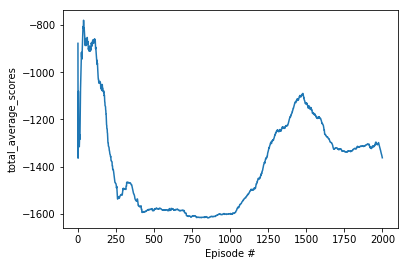

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs)+1), meanRs)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

### 6. Watch the agent running with saved weights

In [14]:
# Load the saved weights into Pytorch model
agent.g.load_state_dict(torch.load('g-pendulum.pth', map_location='cpu'))
agent.d.load_state_dict(torch.load('d-pendulum.pth', map_location='cpu'))

# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# S = env_info.vector_observations                  # get the current states (S) (for each agent)
s = env.reset() # s: state # get the current state (s) (for an agent)

#Rs = np.zeros(num_agents)                          # initialize the total scores (Rs) (for each agent)
R = 0 # R:total reward # initialize the total score (R) (for an agent)

while True:
    #A = agent.act(S)                        # select actions (A) from loaded model agents
    a = agent.act(np.reshape(s, [1, -1])) # a: [-1, +1]    # select action (a) from loaded model agent
    
    # env_info = env.step(A)[brain_name]           # send all actions (A) to tne environment (env)
    # S2 = env_info.vector_observations         # get next states (S2) (for each agent)
    # rewards = env_info.rewards                         # get rewards (for each agent)
    # dones = env_info.local_done                        # see if the episode is done/finished (terminal)
    s2, r, done, _ = env.step(np.reshape(a, [-1]))
    
    # Rs += env_info.rewards                         # update the total scores (Rs) (for each agent)
    # S = S2                               # roll over current states (S) to next states (S2)
    R += r # update the total score (R) (for an agent)
    s = s2 # roll over current state (s) to next state (s2)
    
    #if np.any(dones):                                  # exit loop if episode is done/finished
    if done: # exit loop if episode is done/finished (terminal)
        break
        
print('Average of total scores: {}'.format(R))

FileNotFoundError: [Errno 2] No such file or directory: 'g-pendulum.pth'

When finished, you can close the environment.

In [6]:
env.close()